In [1]:
import tensorflow as tf
from keras.layers import Dense, Conv2D, GlobalAveragePooling2D
from tfkan.layers import DenseKAN, Conv2DKAN

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load fashion-mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# normalize data
x_train = np.expand_dims(x_train / 255.0, axis=-1).astype(np.float32)
x_test = np.expand_dims(x_test / 255.0, axis=-1).astype(np.float32)

In [3]:
# MLP
mlp = tf.keras.models.Sequential([
    Conv2D(filters=32, kernel_size=5, strides=2, padding='valid', activation='relu'),
    Conv2D(filters=64, kernel_size=5, strides=2, padding='valid', activation='relu'),
    GlobalAveragePooling2D(),
    Dense(10, activation='softmax')
])
mlp.build(input_shape=(None, 28, 28, 1))
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          51264     
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 52,746
Trainable params: 52,746
Non-trainable params: 0
_________________________________________________________________


In [4]:
%%time
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_history = mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
469/469 [==============================] - 2s 2ms/step - loss: 0.9627 - accuracy: 0.6477 - val_loss: 0.7485 - val_accuracy: 0.6984
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.6571 - accuracy: 0.7576 - val_loss: 0.6432 - val_accuracy: 0.7643
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5817 - accuracy: 0.7879 - val_loss: 0.5835 - val_accuracy: 0.7901
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5362 - accuracy: 0.8047 - val_loss: 0.5350 - val_accuracy: 0.8044
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5018 - accuracy: 0.8190 - val_loss: 0.5119 - val_accuracy: 0.8139
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4802 - accuracy: 0.8269 - val_loss: 0.4923 - val_accuracy: 0.8244
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4599 - accuracy: 0.8349 - val_loss: 0.4780 - val_accuracy: 0.8280
Epoch 

In [5]:
# KAN
kan = tf.keras.models.Sequential([
    Conv2DKAN(filters=8, kernel_size=5, strides=2, padding='valid', kan_kwargs={'grid_size': 3}),
    tf.keras.layers.LayerNormalization(),
    Conv2DKAN(filters=16, kernel_size=5, strides=2, padding='valid', kan_kwargs={'grid_size': 3}),
    GlobalAveragePooling2D(),
    DenseKAN(10, grid_size=3),
    tf.keras.layers.Softmax()
])
kan.build(input_shape=(None, 28, 28, 1))
kan.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2dkan (Conv2DKAN)       (None, 12, 12, 8)         1408      
                                                                 
 layer_normalization (LayerN  (None, 12, 12, 8)        16        
 ormalization)                                                   
                                                                 
 conv2dkan_1 (Conv2DKAN)     (None, 4, 4, 16)          22416     
                                                                 
 global_average_pooling2d_1   (None, 16)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_kan (DenseKAN)        (None, 10)                1120      
                                                                 
 softmax (Softmax)           (None, 10)               

In [6]:
%%time
kan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
kan_history = kan.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 1.0354 - accuracy: 0.6436 - val_loss: 0.7420 - val_accuracy: 0.7412
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.6522 - accuracy: 0.7708 - val_loss: 0.6215 - val_accuracy: 0.7796
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.5685 - accuracy: 0.7950 - val_loss: 0.5662 - val_accuracy: 0.7954
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.5238 - accuracy: 0.8107 - val_loss: 0.5311 - val_accuracy: 0.8103
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.4951 - accuracy: 0.8212 - val_loss: 0.5219 - val_accuracy: 0.8091
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.4759 - accuracy: 0.8275 - val_loss: 0.4964 - val_accuracy: 0.8222
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.4612 - accuracy: 0.8327 - val_loss: 0.5043 - val_accuracy: 0.8151

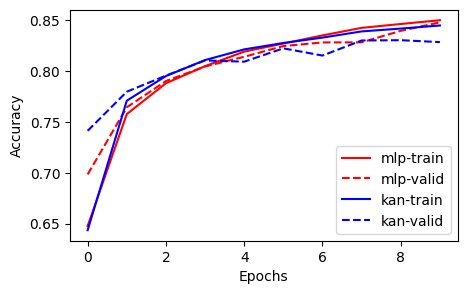

In [7]:
# plot history
fig = plt.figure(figsize=(5,3))
plt.plot(mlp_history.history['accuracy'], label='mlp-train', ls="-", color="red")
plt.plot(mlp_history.history['val_accuracy'], label='mlp-valid', ls="--", color="red")
plt.plot(kan_history.history['accuracy'], label='kan-train', ls="-", color="blue")
plt.plot(kan_history.history['val_accuracy'], label='kan-valid', ls="--", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()